In [1]:
import pandas as pd
import numpy as np
from contextlib import contextmanager
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve,plot_precision_recall_curve, average_precision_score
from sklearn import svm, manifold, decomposition, metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix, average_precision_score, accuracy_score, f1_score
from tqdm import tqdm
import lime

In [2]:
df = pd.read_csv ('./data/standardized_data_2.csv')
# df_pca = pd.read_csv ('./data/component_std_data.csv')
# df_lda = pd.read_csv ('./data/component_tsne_data.csv')
df_pca = pd.read_csv ('./data/component_pca_data.csv')
df_lda = pd.read_csv ('./data/component_lda_data.csv')
print(df.shape)
print(df_pca.shape)
print(df_lda.shape)

(1613, 1666)
(1613, 248)
(1613, 248)


In [3]:
df = df.drop(['age.1','dx.1','group.1','age.2','dx.2','group.2','age.3','dx.3','group.3','age.4','dx.4','group.4','age.5','dx.5','group.5',
         'age.6','dx.6','group.6','age.7','dx.7','group.7','age.8','dx.8','group.8','age.9','dx.9','group.9','age.10','dx.10','group.10',
         'age.11','dx.11','group.11','age.12','dx.12','group.12','age.13','dx.13','group.13','age.14','dx.14','group.14','age.15','dx.15','group.15',
         'age.16','dx.16','group.16','age.17','dx.17','group.17','age.18','dx.18','group.18','age.19','dx.19','group.19','age.20','dx.20','group.20',
         'age.21','dx.21','group.21','age.22','dx.22','group.22','age.23','dx.23','group.23','age.24','dx.24','group.24','age.25','dx.25','group.25',
         'age.26','dx.26','group.26','age.27','dx.27','group.27','age.28','dx.28','group.28','age.29','dx.29','group.29','age.30','dx.30','group.30',
         'age.31','dx.31','group.31','age.32','dx.32','group.32','age.33','dx.33','group.33','age.34','dx.34','group.34','age.35','dx.35','group.35',
         'age.36','dx.36','group.36','age.37','dx.37','group.37','age.38','dx.38','group.38','age.39','dx.39','group.39','age.40','dx.40','group.40',
         'age.41','dx.41','group.41','age.42','dx.42','group.42','age.43','dx.43','group.43','age.44','dx.44','group.44','age.45','dx.45','group.45',
         'age.46','dx.46','group.46','age.47','dx.47','group.47','age.48','dx.48','group.48'], axis=1)

df_pca = df_pca.drop(["age"], axis = 1)
df_lda = df_lda.drop(["age"], axis = 1)
print(df.shape)
print(df_pca.shape)
print(df_lda.shape)

(1613, 1522)
(1613, 247)
(1613, 247)


In [4]:
train_og = pd.DataFrame(df[df["group"] == "train"]).copy()
test_og = pd.DataFrame(df[df["group"] == "test"]).copy()

train_pca = pd.DataFrame(df_pca[df_pca["group"] == "train"]).copy()
test_pca = pd.DataFrame(df_pca[df_pca["group"] == "test"]).copy()
train_lda = pd.DataFrame(df_lda[df_lda["group"] == "train"]).copy()
test_lda = pd.DataFrame(df_lda[df_lda["group"] == "test"]).copy()

y_train_og = pd.DataFrame(train_og["dx"])
y_train_og.loc[(train_og['dx'] == 1)] = 0
y_train_og.loc[(train_og['dx'] == 2)] = 1
y_test_og = pd.DataFrame(test_og["dx"])
y_test_og.loc[(test_og['dx'] == 1)] = 0
y_test_og.loc[(test_og['dx'] == 2)] = 1
x_train_og = train_og.drop(['dx', 'age', 'group'], axis=1)
x_test_og = test_og.drop(['dx', 'age', 'group'], axis=1)

y_train_pca = pd.DataFrame(train_pca["dx"])
y_train_pca.loc[(train_pca['dx'] == 1)] = 0
y_train_pca.loc[(train_pca['dx'] == 2)] = 1
y_test_pca = pd.DataFrame(test_pca["dx"])
y_test_pca.loc[(test_pca['dx'] == 1)] = 0
y_test_pca.loc[(test_pca['dx'] == 2)] = 1
x_train_pca = train_pca.drop(['dx', 'group'], axis=1)
x_test_pca = test_pca.drop(['dx', 'group'], axis=1)

y_train_lda = pd.DataFrame(train_lda["dx"])
y_train_lda.loc[(train_lda['dx'] == 1)] = 0
y_train_lda.loc[(train_lda['dx'] == 2)] = 1
y_test_lda = pd.DataFrame(test_lda["dx"])
y_test_lda.loc[(test_lda['dx'] == 1)] = 0
y_test_lda.loc[(test_lda['dx'] == 2)] = 1
x_train_lda = train_lda.drop(['dx', 'group'], axis=1)
x_test_lda = test_lda.drop(['dx', 'group'], axis=1)


# diag_feat = pd.DataFrame(df_pca["dx"])
# diag_feat.loc[(diag_feat['dx'] == 1)] = 0
# diag_feat.loc[(diag_feat['dx'] == 2)] = 1
# meas_feat = df_pca.loc[:, df_pca.columns != 'dx']

# diag_tsne = pd.DataFrame(df_lda["dx"])
# diag_tsne.loc[(diag_tsne['dx'] == 1)] = 0
# diag_tsne.loc[(diag_tsne['dx'] == 2)] = 1
# meas_tsne = df_lda.loc[:, df_lda.columns != 'dx']

# x_train_pca, x_test_pca, y_train_pca, y_test_pca = sklearn.model_selection.train_test_split(meas_feat, diag_feat, random_state = 749, test_size=0.25,stratify= diag_feat)
# x_train_lda, x_test_lda, y_train_lda, y_test_lda = sklearn.model_selection.train_test_split(meas_tsne, diag_tsne, random_state = 749, test_size=0.25,stratify= diag_tsne)

In [6]:
y_full_og = (pd.concat([y_train_og, y_test_og], axis=0))
x_full_og = (pd.concat([x_train_og, x_test_og], axis=0))
y_full_pca = (pd.concat([y_train_pca, y_test_pca], axis=0))
x_full_pca = (pd.concat([x_train_pca, x_test_pca], axis=0))
y_full_lda = (pd.concat([y_train_lda, y_test_lda], axis=0))
x_full_lda = (pd.concat([x_train_lda, x_test_lda], axis=0))
print(y_train_og.shape)
print(y_test_og.shape)
print(y_full_og.shape)

(1290, 1)
(323, 1)
(1613, 1)


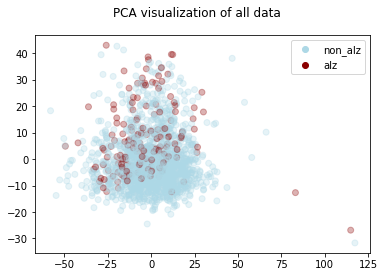

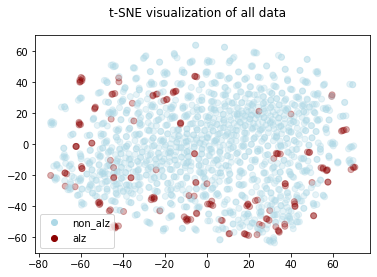

In [7]:
#print('Computing PCA Embedding')
y_full_og = (pd.concat([y_train_og, y_test_og], axis=0))
x_full_og = (pd.concat([x_train_og, x_test_og], axis=0))

pca = decomposition.PCA(n_components=2)
pca.fit(x_full_og)
Y = pca.transform(x_full_og)
colors = ['lightblue' if (i == 0) else 'darkred' for i in y_full_og.values]
fig = plt.figure(1)
fig.suptitle('PCA visualization of all data')
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c=colors, alpha=0.3)
m1, = plt.plot(np.nan, np.nan, c='lightblue', linestyle='None', marker='o', label='non_alz', alpha=1)
m2, = plt.plot(np.nan, np.nan, c='darkred', linestyle='None', marker='o', label="alz", alpha=1)
plt.legend(handles=[m1, m2], loc='best')
plt.show()
#plt.savefig('./pca.png', dpi=300)
#plt.close()

#print('Computing t-SNE Embedding')
tsne = manifold.TSNE(n_components=2, init='pca', random_state=726, n_iter=1500)
Y = tsne.fit_transform(x_full_og)

colors = ['lightblue' if (i == 0) else 'darkred' for i in y_full_og.values]
fig = plt.figure(2)
fig.suptitle('t-SNE visualization of all data')
ax = fig.add_subplot(111)
ax.scatter(Y[:, 0], Y[:, 1], c=colors, alpha=0.3)
m1, = plt.plot(np.nan, np.nan, c='lightblue', linestyle='None', marker='o', label='non_alz', alpha=1)
m2, = plt.plot(np.nan, np.nan, c='darkred', linestyle='None', marker='o', label='alz', alpha=1)
plt.legend(handles=[m1, m2], loc='best')
plt.show()
#plt.savefig('./tsne.png', dpi=300)
#plt.close()


Baseline: ROC AUC=0.500
Logistic all data : ROC AUC=0.923
Logistic pca red. : ROC AUC=0.553
Logistic tsne red.: ROC AUC=0.503


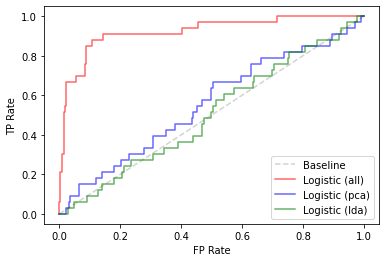

all data
[[282   8]
 [ 11  22]]
features pca
[[271  19]
 [ 29   4]]
features tsne
[[266  24]
 [ 31   2]]


In [8]:
log_reg = LogisticRegression(max_iter=100000,solver="sag", random_state = 726).fit(x_train_og, y_train_og.values.ravel())
log_reg_pca = LogisticRegression(max_iter=100000,solver="sag", random_state = 726).fit(x_train_pca, y_train_pca.values.ravel())
log_reg_lda = LogisticRegression(max_iter=100000,solver="sag", random_state = 666).fit(x_train_lda, y_train_lda.values.ravel())

# random_state=0,
ns_probs = [0 for _ in range(len(y_test_og))]
lr_probs = log_reg.predict_proba(x_test_og)
lr_probs_pca = log_reg_pca.predict_proba(x_test_pca)
lr_probs_lda = log_reg_lda.predict_proba(x_test_lda)
lr_probs = lr_probs[:, 1]
lr_probs_pca = lr_probs_pca[:, 1]
lr_probs_lda = lr_probs_lda[:, 1]
ns_auc = roc_auc_score(y_test_og, ns_probs)
lr_auc = roc_auc_score(y_test_og, lr_probs)
lr_auc_pca = roc_auc_score(y_test_pca, lr_probs_pca)
lr_auc_lda = roc_auc_score(y_test_lda, lr_probs_lda)

print('Baseline: ROC AUC=%.3f' % (ns_auc))
print('Logistic all data : ROC AUC=%.3f' % (lr_auc))
print('Logistic pca red. : ROC AUC=%.3f' % (lr_auc_pca))
print('Logistic tsne red.: ROC AUC=%.3f' % (lr_auc_lda))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_og, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_og, lr_probs)
lr_fpr_pca, lr_tpr_pca, _ = roc_curve(y_test_pca, lr_probs_pca)
lr_fpr_lda, lr_tpr_lda, _ = roc_curve(y_test_lda, lr_probs_lda)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey")
plt.plot(lr_fpr, lr_tpr, marker='', label='Logistic (all)',color = "red", alpha = 0.6)
plt.plot(lr_fpr_pca, lr_tpr_pca, marker='', label='Logistic (pca)',color = "blue", alpha = 0.6)
plt.plot(lr_fpr_lda, lr_tpr_lda, marker='', label='Logistic (lda)',color = "green", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test_og, log_reg.predict(x_test_og)).ravel()
print("all data")
print(confusion_matrix(y_test_og, log_reg.predict(x_test_og)))

tn_pca, fp_pca, fn_pca, tp_pca = confusion_matrix(y_test_pca, log_reg_pca.predict(x_test_pca)).ravel()
print("features pca")
print(confusion_matrix(y_test_pca, log_reg_pca.predict(x_test_pca)))

tn_lda, fp_lda, fn_lda, tp_lda = confusion_matrix(y_test_lda, log_reg_lda.predict(x_test_lda)).ravel()
print("features tsne")
print(confusion_matrix(y_test_lda, log_reg_lda.predict(x_test_lda)))

average percision
all data  : 0.6808
pca red.  : 0.1301
tsne red. : 0.1060


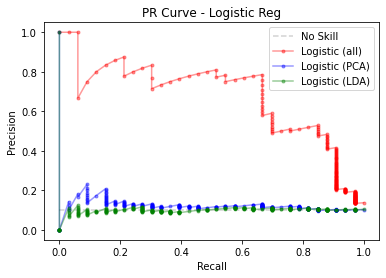

In [9]:
average_precision = average_precision_score(y_test_og, lr_probs)
average_precision_pca = average_precision_score(y_test_pca, lr_probs_pca)
average_precision_lda = average_precision_score(y_test_lda, lr_probs_lda)

no_skill = y_test_og.sum(axis =0) / len(y_test_og)

precision, recall, thresholds = precision_recall_curve(y_test_og, lr_probs)
precision_pca, recall_pca, thresholds_pca = precision_recall_curve(y_test_pca, lr_probs_pca)
precision_lda, recall_lda, thresholds_lda = precision_recall_curve(y_test_lda, lr_probs_lda)

print("average percision")
print("all data  : %.4f" % (average_precision))
print("pca red.  : %.4f" % (average_precision_pca))
print("tsne red. : %.4f" % (average_precision_lda))

plt.title('PR Curve - Logistic Reg')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = "lightgrey")
plt.plot(recall, precision, marker='.', label='Logistic (all)',color = "red", alpha = 0.4)
plt.plot(recall_pca, precision_pca, marker='.', label='Logistic (PCA)',color = "blue", alpha = 0.4)
plt.plot(recall_lda, precision_lda, marker='.', label='Logistic (LDA)',color = "green", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [10]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
X = x_train_og
y = y_train_og

# Support Vector Classification Model --- 
# mod_1  = svm.SVC(random_state=726, probability = True)
# mod_2  = svm.SVC(random_state=726, kernel='linear' ,probability = True)  # default
# mod_3  = svm.SVC(random_state=726, kernel='sigmoid', probability = True)
# mod_4  = svm.SVC(random_state=726, kernel='poly', probability = True)
# mod_6  = svm.SVC(random_state=726, kernel='linear', shrinking=False, probability = True)
# mod_7  = svm.SVC(random_state=726, kernel='linear', probability = True, class_weight={0:0.4,1:0.6})
# mod_8  = svm.SVC(random_state=726, kernel='linear', probability = True, class_weight={0:0.3,1:0.7})
# mod_9  = svm.SVC(random_state=726, kernel='linear', probability = True, class_weight={0:0.45,1:0.55})
# mod_10  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-4)
# mod_11  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-6)
# mod_12  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-8)
# mod_13  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-10)
# mod_14  = svm.SVC(random_state=726, kernel='linear', probability = True,tol=1e-8, gamma='auto')
mod_scv  = svm.SVC(random_state=726, kernel='linear' ,probability = True,break_ties=True)
mod_scv_pca  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-4, break_ties=True)
mod_scv_lda  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-6, break_ties=True)
# mod_16  = svm.SVC(random_state=726, kernel='linear',shrinking=False, probability = True,class_weight={0:0.45,1:0.55},tol=1e-8,break_ties=True)

# Random Forest Classification Model ---
# mod_1 = RandomForestClassifier(random_state=726) # default
# mod_2 = RandomForestClassifier(random_state=726, criterion="entropy") 
# mod_3 = RandomForestClassifier(random_state=726, max_features=None) 
# mod_4 = RandomForestClassifier(random_state=726, max_features="log2") 
# mod_5 = RandomForestClassifier(random_state=726, max_features="sqrt") 
# mod_6 = RandomForestClassifier(random_state=726, max_features=0.2) 
# mod_7 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.015) 
# mod_8 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.005) 
# mod_9 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.01) 
# mod_10 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005) 
# mod_11 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=50) 
# mod_12 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=20) 
# mod_13 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=45) 
# mod_14 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=75) 
# mod_15 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=60)
mod_rfc = RandomForestClassifier(random_state=726, max_features=0.2) 
mod_rfc_pca = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)
mod_rfc_lda = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.000005, n_estimators=150)
# mod_17 = RandomForestClassifier(random_state=726, max_features="sqrt", ccp_alpha=0.00005, n_estimators=80)

# Multi-Layer Perceptron Classification Model ---
# mod_1 = MLPClassifier(random_state=726)  # default
# mod_2 = MLPClassifier(random_state=726, solver='lbfgs')
# mod_3 = MLPClassifier(random_state=726, solver='sgd')
# mod_4 = MLPClassifier(random_state=726, activation = "identity")
# mod_5 = MLPClassifier(random_state=726, activation = "logistic")
# mod_6 = MLPClassifier(random_state=726, activation = "tanh")
# mod_7 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.001)
# mod_8 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0015)
# mod_9 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005)
# mod_10 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0003)
# mod_11 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002)
# mod_12 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, solver = "lbfgs")
# mod_13 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, solver = "sgd")
# mod_14 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(50,))
# mod_15 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,))
# mod_16 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(100,))
# mod_17 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(50,50))
# mod_18 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,50))
# mod_19 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(100,50))
# mod_20 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(50,50,25))
# mod_21 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,50,25))
# mod_22 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(100,50,25))
# mod_23 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "invscaling")
mod_mlp = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0005, hidden_layer_sizes=(150,), learning_rate = "adaptive")
mod_mlp_pca = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,), learning_rate = "invscaling")
mod_mlp_lda = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,), learning_rate = "adaptive")
# mod_25 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=700)
# mod_26 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=500)
# mod_27 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=300)

validation_acc_array_scv, validation_acc_array_rfc, validation_acc_array_mlp = [],[],[]

for train_ix, validation_ix in tqdm(kf.split(X,y),total=5):
    X_train, X_validation = X.iloc[train_ix], X.iloc[validation_ix]
    y_train, y_validation = y.iloc[train_ix], y.iloc[validation_ix]

    mod_scv.fit(X_train, y_train.to_numpy().ravel())
    pred_train_scv = mod_scv.predict(X_train)
    pred_validation_scv = mod_scv.predict(X_validation)
    train_acc_scv = accuracy_score(y_train, pred_train_scv)
    validation_acc_scv = accuracy_score(y_validation, pred_validation_scv)

    mod_rfc.fit(X_train, y_train.to_numpy().ravel())
    pred_train_rfc = mod_rfc.predict(X_train)
    pred_validation_rfc = mod_rfc.predict(X_validation)
    train_acc_rfc = accuracy_score(y_train, pred_train_rfc)
    validation_acc_rfc = accuracy_score(y_validation, pred_validation_rfc)
    
    mod_mlp.fit(X_train, y_train.to_numpy().ravel())
    pred_train_mlp = mod_mlp.predict(X_train)
    pred_validation_mlp = mod_mlp.predict(X_validation)
    train_acc_mlp = accuracy_score(y_train, pred_train_mlp)
    validation_acc_mlp = accuracy_score(y_validation, pred_validation_mlp)

#     lr_probs_scv = mod_mlp.predict_proba(X_validation)
#     lr_probs_scv = lr_probs_scv[:, 1]

#     average_precision = average_precision_score(y_validation, lr_probs_scv)
#     avg_perc.append(average_precision)
    
#     print(confusion_matrix(y_validation, mod_mlp.predict(X_validation)))
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
    # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
     
    validation_acc_array_scv.append(validation_acc_scv)
    validation_acc_array_rfc.append(validation_acc_rfc)
    validation_acc_array_mlp.append(validation_acc_mlp)
# print(np.mean(validation_acc_array))
# print(validation_acc_array)
# print(np.mean(avg_perc))

mod_scv.fit(x_train_og, y_train_og.to_numpy().ravel())
mod_rfc.fit(x_train_og, y_train_og.to_numpy().ravel())
mod_mlp.fit(x_train_og, y_train_og.to_numpy().ravel())

100%|██████████| 5/5 [04:07<00:00, 49.44s/it]


MLPClassifier(activation='tanh', alpha=0.0005, hidden_layer_sizes=(150,),
              learning_rate='adaptive', random_state=726)

In [ ]:
# lr_list = [1,2,3,4,5,6,7,8,10,13,15,20]
# #mod_gbt = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    
# valid_acc_gbt_fin = []
# valid_f1s_gbt_fin = []


# for learning_rate in lr_list:
#     valid_acc_gbt = []
#     valid_f1s_gbt = []

#     mod_gbt = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    
#     for train_ix, validation_ix in tqdm(kf.split(X,y),total=10):
#         X_train, X_validation = X.iloc[train_ix], X.iloc[validation_ix]
#         y_train, y_validation = y.iloc[train_ix], y.iloc[validation_ix]
    
#         mod_gbt.fit(X_train, y_train.to_numpy().ravel())
#         pred_train_gbt = mod_gbt.predict(X_train)
#         pred_validation_gbt = mod_gbt.predict(X_validation)
#         train_acc_gbt = accuracy_score(y_train, pred_train_gbt)
#         validation_acc_gbt = accuracy_score(y_validation, pred_validation_lgrg)
#         validation_f1s_gbt = f1_score(y_validation, pred_validation_gbt)
    
#         valid_acc_gbt.append(validation_acc_gbt)
    
#         valid_f1s_gbt.append(validation_f1s_gbt)
    
#     mod_gbt.fit(x_train_og, y_train_og.to_numpy().ravel())

#     print("Learning rate: ", learning_rate)
#     print("valid acc: {0:.3f}".format(np.mean(valid_acc_gbt)))
#     print("valid f1: {0:.3f}".format(np.mean(valid_f1s_gbt)))
#     print(confusion_matrix(y_test_og, mod_gbt.predict(x_test_og)))
    
# #     print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
# #     print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

# #mod_lgrg.fit(x_train_og, y_train_og.to_numpy().ravel())

# # ----------

# #     lr_probs_scv = mod_mlp.predict_proba(X_validation)
# #     lr_probs_scv = lr_probs_scv[:, 1]

# #     average_precision = average_precision_score(y_validation, lr_probs_scv)
# #     avg_perc.append(average_precision)
    
# #     print(confusion_matrix(y_validation, mod_mlp.predict(X_validation)))
#     # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
#     # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
#     # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
    

# # print(np.mean(validation_acc_array))
# # print(validation_acc_array)
# # print(np.mean(avg_perc))



In [12]:
X_pca = x_train_pca
y_pca = y_train_pca

# Support Vector Classification Model --- 
# mod_1  = svm.SVC(random_state=726, kernel='linear',probability = True)
# mod_2  = svm.SVC(random_state=726, probability = True)  # default
# mod_3  = svm.SVC(random_state=726, kernel='sigmoid', probability = True)
# mod_4  = svm.SVC(random_state=726, kernel='poly', probability = True)
# mod_6  = svm.SVC(random_state=726, kernel='linear', shrinking=False, probability = True)
# mod_7  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6})
# mod_8  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.3,1:0.7})
# mod_9  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55})
# mod_10  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-4)
# mod_11  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-6)
# mod_12  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-8)
# mod_13  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-10)
mod_scv_pca  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55}, tol=1e-4, break_ties=True)
# mod_16  = svm.SVC(random_state=726, kernel='linear',shrinking=False, probability = True,class_weight={0:0.45,1:0.55},tol=1e-8,break_ties=True)

# Random Forest Classification Model ---
# mod_1 = RandomForestClassifier(random_state=726) # default
# mod_2 = RandomForestClassifier(random_state=726, criterion="entropy") 
# mod_3 = RandomForestClassifier(random_state=726, max_features=None) 
# mod_4 = RandomForestClassifier(random_state=726, max_features="log2") 
# mod_5 = RandomForestClassifier(random_state=726, max_features="sqrt") 
# mod_6 = RandomForestClassifier(random_state=726, max_features=0.2) 
# mod_7 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.015) 
# mod_8 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.005) 
# mod_9 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.01) 
# mod_10 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005) 
# mod_11 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=50) 
# mod_12 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=20) 
# mod_13 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=45) 
# mod_14 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=75) 
# mod_15 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)
mod_rfc_pca = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)


# Multi-Layer Perceptron Classification Model ---
# mod_1 = MLPClassifier(random_state=726,max_iter=700)  # default
# mod_2 = MLPClassifier(random_state=726, solver='lbfgs')
# mod_3 = MLPClassifier(random_state=726, solver='sgd')
# mod_4 = MLPClassifier(random_state=726, activation = "identity",max_iter=700)
# mod_5 = MLPClassifier(random_state=726, activation = "logistic",max_iter=700)
# mod_6 = MLPClassifier(random_state=726, activation = "tanh",max_iter=700)
# mod_7 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001)
# mod_8 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0015)
# mod_9 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0005)
# mod_10 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0003)
# mod_11 = MLPClassifier(random_state=726, max_iter=700, alpha=0.0002)
# mod_12 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, solver = "lbfgs")
# mod_13 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, solver = "sgd")
# mod_14 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(50,))
# mod_15 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(150,))
# mod_16 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,))
# mod_17 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(50,50))
# mod_18 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(150,50))
# mod_19 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,50))
# mod_20 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(50,50,25))
# mod_21 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(150,50,25))
# mod_22 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,50,25))
# mod_23 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,), learning_rate = "invscaling")
mod_mlp_pca = MLPClassifier(random_state=726, max_iter=700,  alpha=0.001, hidden_layer_sizes=(100,), learning_rate = "invscaling")
# mod_25 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=700)
# mod_26 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=500)
# mod_27 = MLPClassifier(random_state=726, activation = "tanh", alpha=0.0002, hidden_layer_sizes=(150,50,25), learning_rate = "adaptive",max_iter=300)

validation_acc_array_scv_pca, validation_acc_array_rfc_pca, validation_acc_array_mlp_pca = [],[],[]

for train_ix, validation_ix in tqdm(kf.split(X_pca,y_pca),total=5):
    X_train, X_validation = X_pca.iloc[train_ix], X_pca.iloc[validation_ix]
    y_train, y_validation = y_pca.iloc[train_ix], y_pca.iloc[validation_ix]

    mod_scv_pca.fit(X_train, y_train.to_numpy().ravel())
    pred_train_scv = mod_scv_pca.predict(X_train)
    pred_validation_scv = mod_scv_pca.predict(X_validation)
    train_acc_scv = accuracy_score(y_train, pred_train_scv)
    validation_acc_scv = accuracy_score(y_validation, pred_validation_scv)
    
    mod_rfc_pca.fit(X_train, y_train.to_numpy().ravel())
    pred_train_rfc = mod_rfc_pca.predict(X_train)
    pred_validation_rfc = mod_rfc_pca.predict(X_validation)
    train_acc_rfc = accuracy_score(y_train, pred_train_rfc)
    validation_acc_rfc = accuracy_score(y_validation, pred_validation_rfc)
    
    mod_mlp_pca.fit(X_train, y_train.to_numpy().ravel())
    pred_train_mlp = mod_mlp_pca.predict(X_train)
    pred_validation_mlp = mod_mlp_pca.predict(X_validation)
    train_acc_mlp = accuracy_score(y_train, pred_train_mlp)
    validation_acc_mlp = accuracy_score(y_validation, pred_validation_mlp)
    
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
    # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
     
    validation_acc_array_scv_pca.append(validation_acc_scv)
    validation_acc_array_rfc_pca.append(validation_acc_rfc)
    validation_acc_array_mlp_pca.append(validation_acc_mlp)
    
mod_scv_pca.fit(x_train_pca, y_train_pca.to_numpy().ravel())
mod_rfc_pca.fit(x_train_pca, y_train_pca.to_numpy().ravel())
mod_mlp_pca.fit(x_train_pca, y_train_pca.to_numpy().ravel())

100%|██████████| 5/5 [01:55<00:00, 23.10s/it]


MLPClassifier(alpha=0.001, learning_rate='invscaling', max_iter=700,
              random_state=726)

In [13]:
X_lda = x_train_lda
y_lda = y_train_lda

# Support Vector Classification Model --- 
# mod_1  = svm.SVC(random_state=726, kernel='linear',probability = True)
# mod_2  = svm.SVC(random_state=726, probability = True)  # default
# mod_3  = svm.SVC(random_state=726, kernel='sigmoid', probability = True)
# mod_4  = svm.SVC(random_state=726, kernel='poly', probability = True)
# mod_6  = svm.SVC(random_state=726, kernel='linear', shrinking=False, probability = True)
# mod_7  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6})
# mod_8  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.3,1:0.7})
# mod_9  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.45,1:0.55})
# mod_10  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-4)
# mod_11  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-6)
# mod_12  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-8)
# mod_13  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-10)
mod_scv_lda  = svm.SVC(random_state=726, kernel='linear', probability = True,class_weight={0:0.4,1:0.6}, tol=1e-6, break_ties=True)
# mod_16  = svm.SVC(random_state=726, kernel='linear',shrinking=False, probability = True,class_weight={0:0.45,1:0.55},tol=1e-8,break_ties=True)

# Random Forest Classification Model ---
# mod_1 = RandomForestClassifier(random_state=726) # default
# mod_2 = RandomForestClassifier(random_state=726, criterion="entropy") 
# mod_3 = RandomForestClassifier(random_state=726, max_features=None) 
# mod_4 = RandomForestClassifier(random_state=726, max_features="log2") 
# mod_5 = RandomForestClassifier(random_state=726, max_features="sqrt") 
# mod_6 = RandomForestClassifier(random_state=726, max_features=0.2) 
# mod_7 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.015) 
# mod_8 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.005) 
# mod_9 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.01) 
# mod_10 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005) 
# mod_11 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=50) 
# mod_12 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=20) 
# mod_13 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=45) 
# mod_14 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=75) 
# mod_15 = RandomForestClassifier(random_state=726, max_features=0.2, ccp_alpha=0.00005, n_estimators=150)
mod_rfc_lda = RandomForestClassifier(random_state=729, max_features=0.2, ccp_alpha=0.000005, n_estimators=150)


# Multi-Layer Perceptron Classification Model ---
# mod_1 = MLPClassifier(random_state=726,max_iter=700)  # default
# mod_2 = MLPClassifier(random_state=726, solver='lbfgs',max_iter=700)
# mod_3 = MLPClassifier(random_state=726, solver='sgd',max_iter=700)
# mod_4 = MLPClassifier(random_state=726, solver='sgd', activation = "identity",max_iter=700)
# mod_5 = MLPClassifier(random_state=726, solver='sgd', activation = "logistic",max_iter=700)
# mod_6 = MLPClassifier(random_state=726, solver='sgd', activation = "tanh",max_iter=700)
# mod_7 = MLPClassifier(random_state=726, solver='sgd', max_iter=700,  alpha=0.001)
# mod_8 = MLPClassifier(random_state=726, solver='sgd', max_iter=700, alpha=0.0015)
# mod_9 = MLPClassifier(random_state=726, solver='sgd', max_iter=700, alpha=0.0005)
# mod_10 = MLPClassifier(random_state=726, solver='sgd', max_iter=700, alpha=0.0003)
# mod_11 = MLPClassifier(random_state=726, solver='lbfgs', max_iter=700, alpha=0.0002)
# mod_12 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.0002, solver = "lbfgs")
# mod_13 = MLPClassifier(random_state=726, max_iter=700,  alpha=0.0002, solver = "sgd")
# mod_14 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(50,))
# mod_15 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(150,))
# mod_16 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,))
# mod_17 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(50,50))
# mod_18 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(150,50))
# mod_19 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,50))
# mod_20 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(50,50,25))
# mod_21 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(150,50,25))
# mod_22 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,50,25))
# mod_23 = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,), learning_rate = "adaptive")
mod_mlp_lda = MLPClassifier(random_state=726, solver = "sgd", max_iter=700,  alpha=0.0002, hidden_layer_sizes=(100,), learning_rate = "adaptive")

validation_acc_array_scv_lda, validation_acc_array_rfc_lda, validation_acc_array_mlp_lda = [],[],[]

for train_ix, validation_ix in tqdm(kf.split(X_lda,y_lda),total=5):
    X_train, X_validation = X_lda.iloc[train_ix], X_lda.iloc[validation_ix]
    y_train, y_validation = y_lda.iloc[train_ix], y_lda.iloc[validation_ix]

    mod_scv_lda.fit(X_train, y_train.to_numpy().ravel())
    pred_train_scv = mod_scv_lda.predict(X_train)
    pred_validation_scv = mod_scv_lda.predict(X_validation)
    train_acc_scv = accuracy_score(y_train, pred_train_scv)
    validation_acc_scv = accuracy_score(y_validation, pred_validation_scv)

    mod_rfc_lda.fit(X_train, y_train.to_numpy().ravel())
    pred_train_rfc = mod_rfc_lda.predict(X_train)
    pred_validation_rfc = mod_rfc_lda.predict(X_validation)
    train_acc_rfc = accuracy_score(y_train, pred_train_rfc)
    validation_acc_rfc = accuracy_score(y_validation, pred_validation_rfc)
    
    mod_mlp_lda.fit(X_train, y_train.to_numpy().ravel())
    pred_train_mlp = mod_mlp_lda.predict(X_train)
    pred_validation_mlp = mod_mlp_lda.predict(X_validation)
    train_acc_mlp = accuracy_score(y_train, pred_train_mlp)
    validation_acc_mlp = accuracy_score(y_validation, pred_validation_mlp)

#     lr_probs_scv = mod_mlp_ts.predict_proba(X_validation)
#     lr_probs_scv = lr_probs_scv[:, 1]

#     average_precision = average_precision_score(y_validation, lr_probs_scv)
#     avg_perc.append(average_precision)
    
#     print(confusion_matrix(y_validation, mod_mlp_ts.predict(X_validation)))
    
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g')
    # plot_confusion_matrix(clf, X_train, y_train,cmap='GnBu',values_format='.4g',normalize='true')
    # plot_confusion_matrix(clf, X_validation, y_validation,cmap='GnBu',values_format='.4g')
     
    validation_acc_array_scv_lda.append(validation_acc_scv)
    validation_acc_array_rfc_lda.append(validation_acc_rfc)
    validation_acc_array_mlp_lda.append(validation_acc_mlp)
# print(np.mean(validation_acc_array))
# print(validation_acc_array)

mod_scv_lda.fit(x_train_lda, y_train_lda.to_numpy().ravel())
mod_rfc_lda.fit(x_train_lda, y_train_lda.to_numpy().ravel())
mod_mlp_lda.fit(x_train_lda, y_train_lda.to_numpy().ravel())

  0%|          | 0/5 [00:00<?, ?it/s]/Users/rastkostojsin/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
 20%|██        | 1/5 [00:32<02:10, 32.61s/it]/Users/rastkostojsin/opt/miniconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
 40%|████      | 2/5 [01:15<01:53, 37.67s/it]


KeyboardInterrupt: 

In [ ]:
print("all data")
print(np.mean(validation_acc_array_scv))
print(np.mean(validation_acc_array_rfc))
print(np.mean(validation_acc_array_mlp))
print("\nfeature pca")
print(np.mean(validation_acc_array_scv_pca))
print(np.mean(validation_acc_array_rfc_pca))
print(np.mean(validation_acc_array_mlp_pca))
print("\nfeature lda")
print(np.mean(validation_acc_array_scv_lda))
print(np.mean(validation_acc_array_rfc_lda))
print(np.mean(validation_acc_array_mlp_lda))

# print("all data")
# plot_confusion_matrix(log_reg, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_scv, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_rfc, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_mlp, x_test_og, y_test_og,cmap='GnBu',values_format='.4g')
# print("\nfeature pca")
# plot_confusion_matrix(log_reg_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_scv_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_rfc_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
# plot_confusion_matrix(mod_mlp_ft, x_test_ft, y_test_ft,cmap='GnBu',values_format='.4g')
print("\n\nall data")
print(confusion_matrix(y_test_og, log_reg.predict(x_test_og)))
print(confusion_matrix(y_test_og, mod_scv.predict(x_test_og)))
print(confusion_matrix(y_test_og, mod_rfc.predict(x_test_og)))
print(confusion_matrix(y_test_og, mod_mlp.predict(x_test_og)))
print("\nfeature pca")
print(confusion_matrix(y_test_pca, log_reg_pca.predict(x_test_pca)))
print(confusion_matrix(y_test_pca, mod_scv_pca.predict(x_test_pca)))
print(confusion_matrix(y_test_pca, mod_rfc_pca.predict(x_test_pca)))
print(confusion_matrix(y_test_pca, mod_mlp_pca.predict(x_test_pca)))
print("\nfeature lda")
print(confusion_matrix(y_test_lda, log_reg_lda.predict(x_test_lda)))
print(confusion_matrix(y_test_lda, mod_scv_lda.predict(x_test_lda)))
print(confusion_matrix(y_test_lda, mod_rfc_lda.predict(x_test_lda)))
print(confusion_matrix(y_test_lda, mod_mlp_lda.predict(x_test_lda)))

In [ ]:
ns_probs = [0 for _ in range(len(y_test_og))]
lr_probs_lgrg = log_reg.predict_proba(x_test_og)
lr_probs_lgrg = lr_probs_lgrg[:, 1]
lr_probs_scv = mod_scv.predict_proba(x_test_og)
lr_probs_scv = lr_probs_scv[:, 1]
lr_probs_rfc = mod_rfc.predict_proba(x_test_og)
lr_probs_rfc = lr_probs_rfc[:, 1]
lr_probs_mlp = mod_mlp.predict_proba(x_test_og)
lr_probs_mlp = lr_probs_mlp[:, 1]

lr_probs_lgrg_pca = log_reg_pca.predict_proba(x_test_pca)
lr_probs_lgrg_pca = lr_probs_lgrg_pca[:, 1]
lr_probs_scv_pca = mod_scv_pca.predict_proba(x_test_pca)
lr_probs_scv_pca = lr_probs_scv_pca[:, 1]
lr_probs_rfc_pca = mod_rfc_pca.predict_proba(x_test_pca)
lr_probs_rfc_pca = lr_probs_rfc_pca[:, 1]
lr_probs_mlp_pca = mod_mlp_pca.predict_proba(x_test_pca)
lr_probs_mlp_pca = lr_probs_mlp_pca[:, 1]

lr_probs_lgrg_lda = log_reg_lda.predict_proba(x_test_lda)
lr_probs_lgrg_lda = lr_probs_lgrg_lda[:, 1]
lr_probs_scv_lda = mod_scv_lda.predict_proba(x_test_lda)
lr_probs_scv_lda = lr_probs_scv_lda[:, 1]
lr_probs_rfc_lda = mod_rfc_lda.predict_proba(x_test_lda)
lr_probs_rfc_lda = lr_probs_rfc_lda[:, 1]
lr_probs_mlp_lda = mod_mlp_lda.predict_proba(x_test_lda)
lr_probs_mlp_lda = lr_probs_mlp_lda[:, 1]

print("all data")
pred_test_lgrg = log_reg.predict(x_test_og)
test_acc_lgrg = accuracy_score(y_test_og, pred_test_lgrg)
test_f1_lgrg = f1_score(y_test_og, pred_test_lgrg)
print('Test Accuracy LogReg = %.3f' % (test_acc_lgrg))
pred_test_scv = mod_scv.predict(x_test_og)
test_acc_scv = accuracy_score(y_test_og, pred_test_scv)
test_f1_scv = f1_score(y_test_og, pred_test_scv)
print('Test Accuracy SCV    = %.3f' % (test_acc_scv))
pred_test_rfc = mod_rfc.predict(x_test_og)
test_acc_rfc = accuracy_score(y_test_og, pred_test_rfc)
test_f1_rfc = f1_score(y_test_og, pred_test_rfc)
print('Test Accuracy RFC    = %.3f' % (test_acc_rfc))
pred_test_mlp = mod_mlp.predict(x_test_og)
test_acc_mlp = accuracy_score(y_test_og, pred_test_mlp)
test_f1_mlp = f1_score(y_test_og, pred_test_mlp)
print('Test Accuracy MLP    = %.3f' % (test_acc_mlp))

print('\nTest F1 LogReg = %.3f' % (test_f1_lgrg))
print('Test F1 SCV    = %.3f' % (test_f1_scv))
print('Test F1 RFC    = %.3f' % (test_f1_rfc))
print('Test F1 MLP    = %.3f' % (test_f1_mlp))


print("\nfeature pda")
pred_test_lgrg_pca = log_reg_pca.predict(x_test_pca)
test_acc_lgrg_pca = accuracy_score(y_test_pca, pred_test_lgrg_pca)
test_f1_lgrg_pca = f1_score(y_test_pca, pred_test_lgrg_pca)
print('Test Accuracy LogReg = %.3f' % (test_acc_lgrg_pca))
pred_test_scv_pca = mod_scv_pca.predict(x_test_pca)
test_acc_scv_pca = accuracy_score(y_test_pca, pred_test_scv_pca)
test_f1_scv_pca = f1_score(y_test_pca, pred_test_scv_pca)
print('Test Accuracy SCV    = %.3f' % (test_acc_scv_pca))
pred_test_rfc_pca = mod_rfc_pca.predict(x_test_pca)
test_acc_rfc_pca = accuracy_score(y_test_pca, pred_test_rfc_pca)
test_f1_rfc_pca = f1_score(y_test_pca, pred_test_rfc_pca)
print('Test Accuracy RFC    = %.3f' % (test_acc_rfc_pca))
pred_test_mlp_pca = mod_mlp_pca.predict(x_test_pca)
test_acc_mlp_pca = accuracy_score(y_test_pca, pred_test_mlp_pca)
test_f1_mlp_pca = f1_score(y_test_pca, pred_test_mlp_pca)
print('Test Accuracy MLP    = %.3f' % (test_acc_mlp_pca))

print('\nTest F1 LogReg = %.3f' % (test_f1_lgrg_pca))
print('Test F1 SCV    = %.3f' % (test_f1_scv_pca))
print('Test F1 RFC    = %.3f' % (test_f1_rfc_pca))
print('Test F1 MLP    = %.3f' % (test_f1_mlp_pca))


print("\nfeature lda")
pred_test_lgrg_lda = log_reg_lda.predict(x_test_lda)
test_acc_lgrg_lda = accuracy_score(y_test_lda, pred_test_lgrg_lda)
test_f1_lgrg_lda = f1_score(y_test_lda, pred_test_lgrg_lda)
print('Test Accuracy LogReg = %.3f' % (test_acc_lgrg_lda))
pred_test_scv_lda = mod_scv_lda.predict(x_test_lda)
test_acc_scv_lda = accuracy_score(y_test_lda, pred_test_scv_lda)
test_f1_scv_lda = f1_score(y_test_lda, pred_test_scv_lda)
print('Test Accuracy SCV    = %.3f' % (test_acc_scv_lda))
pred_test_rfc_lda = mod_rfc_lda.predict(x_test_lda)
test_acc_rfc_lda = accuracy_score(y_test_lda, pred_test_rfc_lda)
test_f1_rfc_lda = f1_score(y_test_lda, pred_test_rfc_lda)
print('Test Accuracy RFC    = %.3f' % (test_acc_rfc_lda))
pred_test_mlp_lda = mod_mlp_lda.predict(x_test_lda)
test_acc_mlp_lda = accuracy_score(y_test_lda, pred_test_mlp_lda)
test_f1_mlp_lda = f1_score(y_test_lda, pred_test_mlp_lda)
print('Test Accuracy MLP    = %.3f' % (test_acc_mlp_lda))

print('\nTest F1 LogReg = %.3f' % (test_f1_lgrg_lda))
print('Test F1 SCV    = %.3f' % (test_f1_scv_lda))
print('Test F1 RFC    = %.3f' % (test_f1_rfc_lda))
print('Test F1 MLP    = %.3f' % (test_f1_mlp_lda))


In [ ]:
average_precision_all_lgrg = average_precision_score(y_test_og, lr_probs_lgrg)
average_precision_all_scv = average_precision_score(y_test_og, lr_probs_scv)
average_precision_all_rfc = average_precision_score(y_test_og, lr_probs_rfc)
average_precision_all_mlp = average_precision_score(y_test_og, lr_probs_mlp)

no_skill = y_test_og.sum(axis =0) / len(y_test_og)

precision_all_lgrg, recall_all_lgrg, thresholds_all_lgrg = precision_recall_curve(y_test_og, lr_probs_lgrg)
precision_all_scv, recall_all_scv, thresholds_all_scv = precision_recall_curve(y_test_og, lr_probs_scv)
precision_all_rfc, recall_all_rfc, thresholds_all_rfc = precision_recall_curve(y_test_og, lr_probs_rfc)
precision_all_mlp, recall_all_mlp, thresholds_all_mlp = precision_recall_curve(y_test_og, lr_probs_mlp)

print("average percision - all data")
print("Log Reg  : %.4f" % (average_precision_all_lgrg))
print("SCV      : %.4f" % (average_precision_all_scv))
print("RFC      : %.4f" % (average_precision_all_rfc))
print("MLP      : %.4f" % (average_precision_all_mlp))

plt.title('PR Curve - All Data')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline', color = "lightgrey")
plt.plot(recall_all_lgrg, precision_all_lgrg, marker='.', label='LogReg',color = "red", alpha = 0.4)
plt.plot(recall_all_scv, precision_all_scv, marker='.', label='SCV',color = "blue", alpha = 0.4)
plt.plot(recall_all_rfc, precision_all_rfc, marker='.', label='RFC',color = "green", alpha = 0.4)
plt.plot(recall_all_mlp, precision_all_mlp, marker='.', label='MLP',color = "orange", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
print("all data")
ns_auc = roc_auc_score(y_test_og, ns_probs)
lr_auc_lgrg = roc_auc_score(y_test_og, lr_probs_lgrg)
lr_auc_scv = roc_auc_score(y_test_og, lr_probs_scv)
lr_auc_rfc = roc_auc_score(y_test_og, lr_probs_rfc)
lr_auc_mlp = roc_auc_score(y_test_og, lr_probs_mlp)
print('Baseline: ROC AUC= %.4f' % (ns_auc))
print('Logistic: ROC AUC= %.4f' % (lr_auc_lgrg))
print('SCV     : ROC AUC= %.4f' % (lr_auc_scv))
print('RFC     : ROC AUC= %.4f' % (lr_auc_rfc))
print('MLP     : ROC AUC= %.4f' % (lr_auc_mlp))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_og, ns_probs)
lr_fpr_lgrg, lr_tpr_lgrg, _ = roc_curve(y_test_og, lr_probs_lgrg)
lr_fpr_scv, lr_tpr_scv, _ = roc_curve(y_test_og, lr_probs_scv)
lr_fpr_rfc, lr_tpr_rfc, _ = roc_curve(y_test_og, lr_probs_rfc)
lr_fpr_mlp, lr_tpr_mlp, _ = roc_curve(y_test_og, lr_probs_mlp)

# plot the roc curve for the model
plt.title('ROC Curve - All Data')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.6)
plt.plot(lr_fpr_lgrg, lr_tpr_lgrg, marker='', label='LogReg', color = "red", alpha = 0.6)
plt.plot(lr_fpr_scv, lr_tpr_scv, marker='', label='SCV', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='', label='RFC', color = "green", alpha = 0.6)
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='', label='MLP', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
average_precision_lgrg_pca = average_precision_score(y_test_pca, lr_probs_lgrg_pca)
average_precision_scv_pca = average_precision_score(y_test_pca, lr_probs_scv_pca)
average_precision_rfc_pca = average_precision_score(y_test_pca, lr_probs_rfc_pca)
average_precision_mlp_pca = average_precision_score(y_test_pca, lr_probs_mlp_pca)

no_skill = y_test_pca.sum(axis =0) / len(y_test_pca)

precision_lgrg_pca, recall_lgrg_pca, thresholds_lgrg_pca = precision_recall_curve(y_test_pca, lr_probs_lgrg_pca)
precision_scv_pca, recall_scv_pca, thresholds_scv_pca = precision_recall_curve(y_test_pca, lr_probs_scv_pca)
precision_rfc_pca, recall_rfc_pca, thresholds_rfc_pca = precision_recall_curve(y_test_pca, lr_probs_rfc_pca)
precision_mlp_pca, recall_mlp_pca, thresholds_mlp_pca = precision_recall_curve(y_test_pca, lr_probs_mlp_pca)

print("average percision - PCA Features")
print("Log Reg  : %.4f" % (average_precision_lgrg_pca))
print("SCV      : %.4f" % (average_precision_scv_pca))
print("RFC      : %.4f" % (average_precision_rfc_pca))
print("MLP      : %.4f" % (average_precision_mlp_pca))

plt.title('PR Curve - PCA Features')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline', color = "lightgrey")
plt.plot(recall_lgrg_pca, precision_lgrg_pca, marker='.', label='LogReg',color = "red", alpha = 0.4)
plt.plot(recall_scv_pca, precision_scv_pca, marker='.', label='SCV',color = "blue", alpha = 0.4)
plt.plot(recall_rfc_pca, precision_rfc_pca, marker='.', label='RFC',color = "green", alpha = 0.4)
plt.plot(recall_mlp_pca, precision_mlp_pca, marker='.', label='MLP',color = "orange", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
print("features pca")
ns_auc = roc_auc_score(y_test_pca, ns_probs)
lr_auc_lgrg_pca = roc_auc_score(y_test_pca, lr_probs_lgrg_pca)
lr_auc_scv_pca = roc_auc_score(y_test_pca, lr_probs_scv_pca)
lr_auc_rfc_pca = roc_auc_score(y_test_pca, lr_probs_rfc_pca)
lr_auc_mlp_pca = roc_auc_score(y_test_pca, lr_probs_mlp_pca)
print('Baseline: ROC AUC= %.4f' % (ns_auc))
print('Logistic: ROC AUC= %.4f' % (lr_auc_lgrg_pca))
print('SCV     : ROC AUC= %.4f' % (lr_auc_scv_pca))
print('RFC     : ROC AUC= %.4f' % (lr_auc_rfc_pca))
print('MLP     : ROC AUC= %.4f' % (lr_auc_mlp_pca))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_pca, ns_probs)
lr_fpr_lgrg_pca, lr_tpr_lgrg_pca, _ = roc_curve(y_test_pca, lr_probs_lgrg_pca)
lr_fpr_scv_pca, lr_tpr_scv_pca, _ = roc_curve(y_test_pca, lr_probs_scv_pca)
lr_fpr_rfc_pca, lr_tpr_rfc_pca, _ = roc_curve(y_test_pca, lr_probs_rfc_pca)
lr_fpr_mlp_pca, lr_tpr_mlp_pca, _ = roc_curve(y_test_pca, lr_probs_mlp_pca)

# plot the roc curve for the model
plt.title('ROC Curve - PCA Features')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.6)
plt.plot(lr_fpr_lgrg_pca, lr_tpr_lgrg_pca, marker='', label='LogReg', color = "red", alpha = 0.6)
plt.plot(lr_fpr_scv_pca, lr_tpr_scv_pca, marker='', label='SCV', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_rfc_pca, lr_tpr_rfc_pca, marker='', label='RFC', color = "green", alpha = 0.6)
plt.plot(lr_fpr_mlp_pca, lr_tpr_mlp_pca, marker='', label='MLP', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
average_precision_lgrg_lda = average_precision_score(y_test_lda, lr_probs_lgrg_lda)
average_precision_scv_lda = average_precision_score(y_test_lda, lr_probs_scv_lda)
average_precision_rfc_lda = average_precision_score(y_test_lda, lr_probs_rfc_lda)
average_precision_mlp_lda = average_precision_score(y_test_lda, lr_probs_mlp_lda)

no_skill = y_test_lda.sum(axis =0) / len(y_test_lda)

precision_lgrg_lda, recall_lgrg_lda, thresholds_lgrg_lda = precision_recall_curve(y_test_lda, lr_probs_lgrg_lda)
precision_scv_lda, recall_scv_lda, thresholds_scv_lda = precision_recall_curve(y_test_lda, lr_probs_scv_lda)
precision_rfc_lda, recall_rfc_lda, thresholds_rfc_lda = precision_recall_curve(y_test_lda, lr_probs_rfc_lda)
precision_mlp_lda, recall_mlp_lda, thresholds_mlp_lda = precision_recall_curve(y_test_lda, lr_probs_mlp_lda)

print("average percision - LDA Features")
print("Log Reg  : %.4f" % (average_precision_lgrg_lda))
print("SCV      : %.4f" % (average_precision_scv_lda))
print("RFC      : %.4f" % (average_precision_rfc_lda))
print("MLP      : %.4f" % (average_precision_mlp_lda))

plt.title('PR Curve - LDA Features')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = "lightgrey")
plt.plot(recall_lgrg_lda, precision_lgrg_lda, marker='.', label='LogReg',color = "red", alpha = 0.4)
plt.plot(recall_scv_lda, precision_scv_lda, marker='.', label='SCV',color = "blue", alpha = 0.4)
plt.plot(recall_rfc_lda, precision_rfc_lda, marker='.', label='RFC',color = "green", alpha = 0.4)
plt.plot(recall_mlp_lda, precision_mlp_lda, marker='.', label='MLP',color = "orange", alpha = 0.4)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
print("features LDA")
ns_auc = roc_auc_score(y_test_lda, ns_probs)
lr_auc_lgrg_lda = roc_auc_score(y_test_lda, lr_probs_lgrg_lda)
lr_auc_scv_lda = roc_auc_score(y_test_lda, lr_probs_scv_lda)
lr_auc_rfc_lda = roc_auc_score(y_test_lda, lr_probs_rfc_lda)
lr_auc_mlp_lda = roc_auc_score(y_test_lda, lr_probs_mlp_lda)
print('Baseline: ROC AUC= %.4f' % (ns_auc))
print('Logistic: ROC AUC= %.4f' % (lr_auc_lgrg_lda))
print('SCV     : ROC AUC= %.4f' % (lr_auc_scv_lda))
print('RFC     : ROC AUC= %.4f' % (lr_auc_rfc_lda))
print('MLP     : ROC AUC= %.4f' % (lr_auc_mlp_lda))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_lda, ns_probs)
lr_fpr_lgrg_lda, lr_tpr_lgrg_lda, _ = roc_curve(y_test_lda, lr_probs_lgrg_lda)
lr_fpr_scv_lda, lr_tpr_scv_lda, _ = roc_curve(y_test_lda, lr_probs_scv_lda)
lr_fpr_rfc_lda, lr_tpr_rfc_lda, _ = roc_curve(y_test_lda, lr_probs_rfc_lda)
lr_fpr_mlp_lda, lr_tpr_mlp_lda, _ = roc_curve(y_test_lda, lr_probs_mlp_lda)

# plot the roc curve for the model
plt.title('ROC Curve - LDA Features')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.6)
plt.plot(lr_fpr_lgrg_lda, lr_tpr_lgrg_lda, marker='', label='LogReg', color = "red", alpha = 0.6)
plt.plot(lr_fpr_scv_lda, lr_tpr_scv_lda, marker='', label='SCV', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_rfc_lda, lr_tpr_rfc_lda, marker='', label='RFC', color = "green", alpha = 0.6)
plt.plot(lr_fpr_mlp_lda, lr_tpr_mlp_lda, marker='', label='MLP', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
plt.title('PR Curve - All Models')
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = "lightgrey")
plt.plot(recall_all_lgrg, precision_all_lgrg, marker='', label='all data models',color = "red", alpha = 0.2)
plt.plot(recall_all_scv, precision_all_scv, marker='',color = "red", alpha = 0.2)
plt.plot(recall_all_rfc, precision_all_rfc, marker='',color = "red", alpha = 0.2)
plt.plot(recall_all_mlp, precision_all_mlp, marker='',color = "red", alpha = 0.2)
plt.plot(recall_lgrg_pca, precision_lgrg_pca, marker='', label='feature pca models',color = "blue", alpha = 0.2)
plt.plot(recall_scv_pca, precision_scv_pca, marker='',color = "blue", alpha = 0.2)
plt.plot(recall_rfc_pca, precision_rfc_pca, marker='',color = "blue", alpha = 0.2)
plt.plot(recall_mlp_pca, precision_mlp_pca, marker='',color = "blue", alpha = 0.2)
plt.plot(recall_lgrg_lda, precision_lgrg_lda, marker='', label='feature lda models',color = "orange", alpha = 0.2)
plt.plot(recall_scv_lda, precision_scv_lda, marker='',color = "orange", alpha = 0.2)
plt.plot(recall_rfc_lda, precision_rfc_lda, marker='',color = "orange", alpha = 0.2)
plt.plot(recall_mlp_lda, precision_mlp_lda, marker='',color = "orange", alpha = 0.2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

In [ ]:
plt.title('ROC Curve - All Models')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.4)
plt.plot(lr_fpr_lgrg, lr_tpr_lgrg, marker='', label='all data models', color = "red", alpha = 0.2)
plt.plot(lr_fpr_scv, lr_tpr_scv, marker='', color = "red", alpha = 0.2)
plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='', color = "red", alpha = 0.2)
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='', color = "red", alpha = 0.2)
plt.plot(lr_fpr_lgrg_pca, lr_tpr_lgrg_pca, marker='', label='feature pca models', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_scv_pca, lr_tpr_scv_pca, marker='', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_rfc_pca, lr_tpr_rfc_pca, marker='', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_mlp_pca, lr_tpr_mlp_pca, marker='', color = "blue", alpha = 0.2)
plt.plot(lr_fpr_lgrg_lda, lr_tpr_lgrg_lda, marker='', label='feature lda models', color = "orange", alpha = 0.2)
plt.plot(lr_fpr_scv_lda, lr_tpr_scv_lda, marker='', color = "orange", alpha = 0.2)
plt.plot(lr_fpr_rfc_lda, lr_tpr_rfc_lda, marker='', color = "orange", alpha = 0.2)
plt.plot(lr_fpr_mlp_lda, lr_tpr_mlp_lda, marker='', color = "orange", alpha = 0.2)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline', color = "lightgrey", alpha = 0.2)
#plt.plot(lr_fpr_lgrg, lr_tpr_lgrg, marker='', label='all data', color = "red", alpha = 0.6)
#plt.plot(lr_fpr_scv, lr_tpr_scv, marker='', label='all data', color = "red", alpha = 0.6)
#plt.plot(lr_fpr_rfc, lr_tpr_rfc, marker='', label='all data', color = "red", alpha = 0.6)
plt.plot(lr_fpr_mlp, lr_tpr_mlp, marker='', label='all data', color = "red", alpha = 0.6)
#plt.plot(lr_fpr_lgrg_ft, lr_tpr_lgrg_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
#plt.plot(lr_fpr_scv_ft, lr_tpr_scv_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
#plt.plot(lr_fpr_rfc_ft, lr_tpr_rfc_ft, marker='', label='feature pca', color = "blue", alpha = 0.6)
plt.plot(lr_fpr_mlp_pca, lr_tpr_mlp_pca, marker='', label='feature pca', color = "blue", alpha = 0.6)
#plt.plot(lr_fpr_lgrg_ts, lr_tpr_lgrg_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
#plt.plot(lr_fpr_scv_ts, lr_tpr_scv_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
#plt.plot(lr_fpr_rfc_ts, lr_tpr_rfc_ts, marker='', label='feature tsne', color = "orange", alpha = 0.6)
plt.plot(lr_fpr_mlp_lda, lr_tpr_mlp_lda, marker='', label='feature lda', color = "orange", alpha = 0.6)
# axis labels
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Log Reg Feature Importance

In [23]:
importance_all = log_reg.coef_[0]

log_reg_all_fimp = pd.concat((pd.DataFrame(x_full_og.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_all).rename(columns={0:"importance"})),axis=1)
log_reg_all_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_all_fimp["importance"]))
log_reg_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
707,b23_V26,-0.516516
373,b13_V2,0.393915
417,b14_V15,0.383700
948,b31_V19,0.371765
1502,b49_V15,-0.363095
1410,b46_V16,0.349414
282,b10_V4,0.330314
1379,b45_V16,0.329024
914,b30_V16,0.325432
853,b28_V17,0.324013


In [24]:
importance_pca = log_reg_pca.coef_[0]

log_reg_pca_fimp = pd.concat((pd.DataFrame(x_full_pca.columns).rename(columns={0:"feature"}), 
                              pd.DataFrame(importance_pca).rename(columns={0:"importance"})),axis=1)
log_reg_pca_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_pca_fimp["importance"]))
log_reg_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
217,b_22_microstruc,0.869879
142,b_45_volumn,0.829458
207,b_12_microstruc,0.774321
191,b_45_surfarea,-0.756235
116,b_19_volumn,0.685180
123,b_26_volumn,-0.632464
41,b_42_shape,-0.601007
143,b_46_volumn,0.588259
99,b_2_volumn,-0.559171
136,b_39_volumn,-0.550142


In [25]:
importance_lda = log_reg_lda.coef_[0]

log_reg_lda_fimp = pd.concat((pd.DataFrame(x_full_lda.columns).rename(columns={0:"feature"}), 
                               pd.DataFrame(importance_lda).rename(columns={0:"importance"})),axis=1)
log_reg_lda_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_lda_fimp["importance"]))
log_reg_lda_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
169,b_23_surfarea,-0.716330
0,b_1_shape,0.676488
120,b_23_volumn,0.670233
52,b_4_length,0.600092
31,b_32_shape,0.567823
3,b_4_shape,-0.547296
34,b_35_shape,-0.531808
55,b_7_length,-0.520113
124,b_27_volumn,0.517553
239,b_44_microstruc,-0.495199


## SVC Feature Importance

In [26]:
importance_all_scv = mod_scv.coef_[0]

scv_all_fimp = pd.concat((pd.DataFrame(x_full_og.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_all_scv).rename(columns={0:"importance"})),axis=1)
scv_all_fimp["abs importance"] = np.abs(pd.to_numeric(scv_all_fimp["importance"]))
scv_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)


,feature,importance
707,b23_V26,-0.142461
1502,b49_V15,-0.139375
373,b13_V2,0.126292
417,b14_V15,0.124348
948,b31_V19,0.120639
1429,b47_V4,0.120268
853,b28_V17,0.113659
282,b10_V4,0.113121
945,b31_V16,-0.106556
1379,b45_V16,0.103321


In [27]:
importance_pca_scv = mod_scv_pca.coef_[0]

scv_pca_fimp = pd.concat((pd.DataFrame(x_full_pca.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_pca_scv).rename(columns={0:"importance"})),axis=1)
scv_pca_fimp["abs importance"] = np.abs(pd.to_numeric(scv_pca_fimp["importance"]))
scv_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
142,b_45_volumn,0.570598
99,b_2_volumn,-0.567655
191,b_45_surfarea,-0.518848
143,b_46_volumn,0.481767
217,b_22_microstruc,0.478408
41,b_42_shape,-0.438312
141,b_44_volumn,-0.388003
148,b_2_surfarea,0.371479
109,b_12_volumn,0.358961
197,b_2_microstruc,0.351626


In [28]:
importance_tsne_scv = mod_scv_lda.coef_[0]

scv_tsne_fimp = pd.concat((pd.DataFrame(x_full_lda.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_tsne_scv).rename(columns={0:"importance"})),axis=1)
scv_tsne_fimp["abs importance"] = np.abs(pd.to_numeric(scv_tsne_fimp["importance"]))
scv_tsne_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
169,b_23_surfarea,-0.469026
75,b_27_length,-0.447374
0,b_1_shape,0.418472
3,b_4_shape,-0.406280
52,b_4_length,0.405268
238,b_43_microstruc,0.370370
239,b_44_microstruc,-0.369180
141,b_44_volumn,-0.362786
124,b_27_volumn,0.346361
120,b_23_volumn,0.345917


## Random Forest Feature Importance

In [29]:
importance_all_rfc = mod_rfc.feature_importances_

rfc_all_fimp = pd.concat((pd.DataFrame(x_full_og.columns).rename(columns={0:"feature"}), 
                          pd.DataFrame(importance_all_rfc).rename(columns={0:"importance"})),axis=1)
rfc_all_fimp.sort_values(by=["importance"], ascending=False).head(10)

,feature,importance
953,b31_V24,0.019164
933,b31_V4,0.012080
1512,b49_V25,0.010000
1024,b34_V2,0.007991
1500,b49_V13,0.006599
1027,b34_V5,0.006564
376,b13_V5,0.006491
1410,b46_V16,0.006353
284,b10_V6,0.006252
948,b31_V19,0.006201


In [30]:
importance_pca_rfc = mod_rfc_pca.feature_importances_

rfc_pca_fimp = pd.concat((pd.DataFrame(x_full_pca.columns).rename(columns={0:"feature"}), 
                          pd.DataFrame(importance_pca_rfc).rename(columns={0:"importance"})),axis=1)
rfc_pca_fimp.sort_values(by=["importance"], ascending=False).head(10)

,feature,importance
18,b_19_shape,0.018690
129,b_32_volumn,0.013794
111,b_14_volumn,0.010309
32,b_33_shape,0.010198
91,b_43_length,0.010009
134,b_37_volumn,0.010002
56,b_8_length,0.009816
13,b_14_shape,0.008981
183,b_37_surfarea,0.008667
128,b_31_volumn,0.008531


In [31]:
importance_tsne_rfc = mod_rfc_lda.feature_importances_

rfc_tsne_fimp = pd.concat((pd.DataFrame(x_full_lda.columns).rename(columns={0:"feature"}), 
                          pd.DataFrame(importance_tsne_rfc).rename(columns={0:"importance"})),axis=1)
rfc_tsne_fimp.sort_values(by=["importance"], ascending=False).head(10)

,feature,importance
67,b_19_length,0.017698
148,b_2_surfarea,0.012260
233,b_38_microstruc,0.012166
2,b_3_shape,0.011633
11,b_12_shape,0.011273
40,b_41_shape,0.010750
134,b_37_volumn,0.010606
51,b_3_length,0.010523
129,b_32_volumn,0.010480
218,b_23_microstruc,0.010438


In [32]:
# x_train_og, x_test_og, y_train_og, y_test_og
# https://romainlhardy.medium.com/estimating-feature-importance-the-easy-way-2ebe970c600c

## MLP Feature Importance

In [33]:
def get_feature_importance(j, n, y_test, x_test, test_pred, model):
    s = f1_score(y_test, test_pred) # baseline score
    total = 0.0
    for i in range(n):
        perm = np.random.permutation(range(x_test.to_numpy().shape[0]))
        X_test_ = x_test.to_numpy().copy()
        X_test_[:, j] = x_test.to_numpy()[perm, j]
        y_pred_ = model.predict(X_test_)
        s_ij = f1_score(y_test, y_pred_)
        total += s_ij
    return s - total / n

In [34]:
# Feature importances
n = 50
f_all = []

for j in tqdm(range(x_test_og.shape[1])): # n=50 : time=11min
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_mlp, mod_mlp)
    f_all.append(f_j)

100%|██████████| 1519/1519 [10:53<00:00,  2.33it/s]


In [35]:
n = 400
f_pca = []
f_lda = []

for j in tqdm(range(x_test_pca.shape[1])): # n=400 : time=15min
    f_j = get_feature_importance(j, n, y_test_pca, x_test_pca, pred_test_mlp_pca, mod_mlp_pca)
    f_pca.append(f_j)

for j in tqdm(range(x_test_lda.shape[1])): # n=400 : time=15min
    f_j = get_feature_importance(j, n, y_test_lda, x_test_lda, pred_test_mlp_lda, mod_mlp_lda)
    f_lda.append(f_j)

100%|██████████| 245/245 [04:15<00:00,  1.04s/it]


In [36]:
mlp_all_fimp = pd.DataFrame({'feature': list(x_test_og.columns),'importance': f_all})
mlp_all_fimp["abs importance"] = np.abs(pd.to_numeric(mlp_all_fimp["importance"]))
mlp_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
728,b24_V16,0.019276
736,b24_V24,0.017395
693,b23_V12,0.017072
1396,b46_V2,0.016875
1366,b45_V3,0.016412
1412,b46_V18,0.016304
1474,b48_V18,0.015953
560,b19_V3,0.015953
1399,b46_V5,0.015771
1473,b48_V17,-0.015688


In [37]:
mlp_pca_fimp = pd.DataFrame({'feature': list(x_test_pca.columns),'importance': f_pca})
mlp_pca_fimp["abs importance"] = np.abs(pd.to_numeric(mlp_pca_fimp["importance"]))
mlp_pca_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
45,b_46_shape,-0.067748
183,b_37_surfarea,-0.064172
40,b_41_shape,-0.058813
116,b_19_volumn,-0.051366
69,b_21_length,-0.048133
84,b_36_length,-0.047926
127,b_30_volumn,-0.046488
11,b_12_shape,-0.044613
160,b_14_surfarea,-0.043673
175,b_29_surfarea,-0.042757


In [38]:
mlp_tsne_fimp = pd.DataFrame({'feature': list(x_test_pca.columns),'importance': f_lda})
mlp_tsne_fimp["abs importance"] = np.abs(pd.to_numeric(mlp_tsne_fimp["importance"]))
mlp_tsne_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
139,b_42_volumn,-0.075577
188,b_42_surfarea,-0.072851
104,b_7_volumn,-0.069545
200,b_5_microstruc,-0.064932
242,b_47_microstruc,-0.064570
58,b_10_length,-0.061726
120,b_23_volumn,-0.061388
179,b_33_surfarea,-0.060085
62,b_14_length,-0.058899
216,b_21_microstruc,-0.058062


In [39]:
# Feature importances
n = 50
f_all_lgrg = []

for j in tqdm(range(x_test_og.shape[1])):
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_lgrg, log_reg)
    f_all_lgrg.append(f_j)

100%|██████████| 1519/1519 [06:01<00:00,  4.21it/s]


In [40]:
importance_all = log_reg.coef_[0]

log_reg_all_fimp = pd.concat((pd.DataFrame(x_test_og.columns).rename(columns={0:"feature"}), 
                              pd.DataFrame(importance_all).rename(columns={0:"importance"})),axis=1)
log_reg_all_fimp["abs importance"] = np.abs(pd.to_numeric(log_reg_all_fimp["importance"]))
log_reg_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(20)

,feature,importance
707,b23_V26,-0.516516
373,b13_V2,0.393915
417,b14_V15,0.383700
948,b31_V19,0.371765
1502,b49_V15,-0.363095
1410,b46_V16,0.349414
282,b10_V4,0.330314
1379,b45_V16,0.329024
914,b30_V16,0.325432
853,b28_V17,0.324013


In [41]:
lgrg_all_fimp = pd.DataFrame({'feature': list(x_test_og.columns),'importance': f_all_lgrg})
lgrg_all_fimp["abs importance"] = np.abs(pd.to_numeric(lgrg_all_fimp["importance"]))
lgrg_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(20)

,feature,importance
44,b2_V14,0.068852
373,b13_V2,0.059980
789,b26_V15,0.056859
1133,b37_V18,0.053385
853,b28_V17,0.049943
1190,b39_V13,0.049369
1104,b36_V20,0.044050
50,b2_V20,0.043608
1502,b49_V15,0.041995
1035,b34_V13,0.041980


In [42]:
ranked_lgrg_all_fimp = lgrg_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1)
ranked_lgrg_all_fimp.shape

(1519, 2)

In [43]:
ranked_log_reg_all_fimp = log_reg_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1)
ranked_log_reg_all_fimp.shape

(1519, 2)

<AxesSubplot:xlabel='beta importance', ylabel='derived importance'>

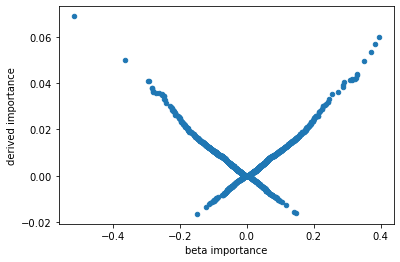

In [44]:
df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(ranked_log_reg_all_fimp.importance),'derived importance': list(ranked_lgrg_all_fimp.importance)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

In [52]:
# Feature importances
n = 100
f_all_scv = []

for j in tqdm(range(x_test_og.shape[1])): # n=100 : time=8:30hrs
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_scv, mod_scv)
    f_all_scv.append(f_j)

100%|██████████| 1519/1519 [8:32:28<00:00, 20.24s/it]  


In [58]:
importance_all_scv = mod_scv.coef_[0]

scv_all_fimp = pd.concat((pd.DataFrame(x_full_og.columns).rename(columns={0:"feature"}),
                              pd.DataFrame(importance_all_scv).rename(columns={0:"importance"})),axis=1)
scv_all_fimp["abs importance"] = np.abs(pd.to_numeric(scv_all_fimp["importance"]))
scv_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1).head(10)

,feature,importance
707,b23_V26,-0.142461
1502,b49_V15,-0.139375
373,b13_V2,0.126292
417,b14_V15,0.124348
948,b31_V19,0.120639
1429,b47_V4,0.120268
853,b28_V17,0.113659
282,b10_V4,0.113121
945,b31_V16,-0.106556
1379,b45_V16,0.103321


In [59]:
scv_all_fimp = pd.DataFrame({'feature': list(x_test_og.columns),'importance': f_all_scv})
scv_all_fimp["abs importance"] = np.abs(pd.to_numeric(scv_all_fimp["importance"]))
scv_all_fimp_rank = scv_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1)
scv_all_fimp_rank

,feature,importance
531,b18_V5,2.709250e-02
521,b17_V26,2.121694e-02
853,b28_V17,2.106941e-02
871,b29_V4,1.808191e-02
282,b10_V4,-1.790719e-02
...,...,...
932,b31_V3,1.110223e-15
344,b12_V4,1.110223e-15
935,b31_V6,1.110223e-15
936,b31_V7,1.110223e-15


In [60]:
ranked_scv_all_fimp = scv_all_fimp.sort_values(by=["abs importance"], ascending=False).drop("abs importance",axis=1)
ranked_scv_all_fimp.shape

(1519, 2)

<AxesSubplot:xlabel='beta importance', ylabel='derived importance'>

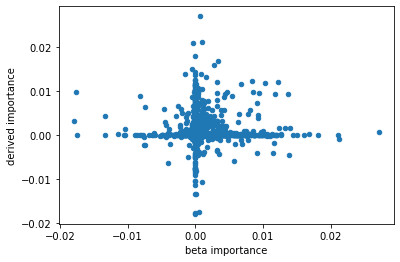

In [61]:
df_help2 = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(scv_all_fimp.importance),'derived importance': list(scv_all_fimp_rank.importance)})
df_help2.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

In [57]:
scv_all_fimp.to_csv('./data/scv_all_fimp.csv', index=False)
scv_all_fimp_rank.to_csv('./data/scv_all_fimp_rank.csv', index=False)

In [ ]:
# Feature importances
n = 200 # n=50 : time=7min
f_lgrg = []

for j in tqdm(range(x_test_og.shape[1])):
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_lgrg, mod_lgrg)
    f_lgrg.append(f_j)
    
fimp_lgrg_der = pd.DataFrame({'feature': list(x_test_og.columns),'importance_der': f_lgrg})
fimp_lgrg_der.sort_values(by=["importance_der"], ascending=False).head(5)

df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(fimp_lgrg["lgrg_importance"]),'derived importance': list(fimp_lgrg_der.importance_der)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(abs(fimp_lgrg["lgrg_importance"])),'derived importance': list(fimp_lgrg_der.importance_der)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

In [ ]:
# Feature importances
n = 5 # n=3 : time=15min - n=6 : t=30min
f_svc = []

for j in tqdm(range(x_test_og.shape[1])):
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_svc, mod_svc)
    f_svc.append(f_j)

fimp_svc_der = pd.DataFrame({'feature': list(x_test_og.columns),'importance_der': f_svc})
fimp_svc_der.sort_values(by=["importance_der"], ascending=False).head(5)

df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(fimp_svc["svc_importance"]),'derived importance': list(fimp_svc_der.importance_der)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(abs(fimp_svc["svc_importance"])),'derived importance': list(fimp_svc_der.importance_der)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

In [ ]:
# Feature importances
n = 20 # n=20 : time=15min
f_rfc = []

for j in tqdm(range(x_test_og.shape[1])):
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_rfc, mod_rfc)
    f_rfc.append(f_j)

fimp_rfc_der = pd.DataFrame({'feature': list(x_test_og.columns),'importance_der': f_rfc})
fimp_rfc_der.sort_values(by=["importance_der"], ascending=False).head(5)

df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(fimp_rfc["rfc_importance"]),'derived importance': list(fimp_rfc_der.importance_der)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")

In [ ]:
# Feature importances
n = 60 # n=20 : time=15min
f_gbt = []

for j in tqdm(range(x_test_og.shape[1])):
    f_j = get_feature_importance(j, n, y_test_og, x_test_og, pred_test_gbt, mod_gbt)
    f_gbt.append(f_j)
    
fimp_gbt_der = pd.DataFrame({'feature': list(x_test_og.columns),'importance_der': f_gbt})
fimp_gbt_der.sort_values(by=["importance_der"], ascending=False).head(5)

df_help = pd.DataFrame({'rank': range(0,1519), 'beta importance': list(fimp_gbt["gbt_importance"]),'derived importance': list(fimp_gbt_der.importance_der)})
df_help.plot.scatter('beta importance', 'derived importance')#,s = "rank")#,c= "rank")